# 串起来：让机器人可以简单地玩游戏


In [53]:
from CyClient import *
import time
import numpy as np
from matchUtil import *
from Cut import *
import matplotlib.pyplot as plt
cli = Client()
cli.sayHello()

received:     Hello From Server 


In [54]:
cli.takAction(4,0,0)
time.sleep(0.5)
cli.takAction(3,0,0)

received:     M         4         0         0
received:     M         3         0         0


## test

received: 
600 800 3
30000
0.90460205078125


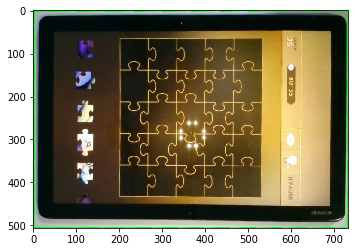

In [55]:
test = cli.getPic()
plt.imshow(test)
cut = get_Contour(test)
plt.imshow(cut)

In [23]:
from matchUtil import *

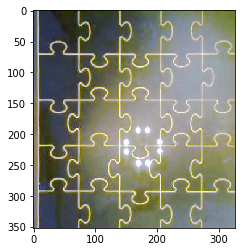

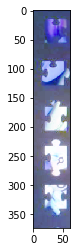

[13, 216]


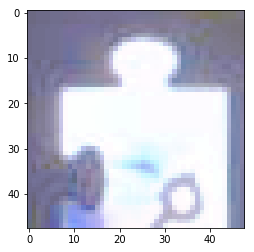

In [24]:
sor = cutout_source(cut,cut)
plt.imshow(sor)
plt.show()  
#s_x = int(sor.shape[0]/5)
#s_y = int(sor.shape[1]/5)
    
temp_area = cutout_template_area(cut,cut)
plt.imshow(temp_area)
plt.show()
temp_pos = []
temp = cutout_template(cut,cut,temp_pos)
#temp_pos
plt.imshow(temp)
print(temp_pos)

In [25]:
template = cut
print(temp_pos)
imgshape = template.shape
print(imgshape)
#PHONESIZE = (155,235)
diviceShape = (155,235)
temp_pos_1 = (temp_pos[0]+20 + template.shape[1]*0.114 , temp_pos[1] +25+ template.shape[0]*0.111)
print(temp_pos_1)
x,y =temp_pos_1
#1,0,0,1
x =  (1-x/imgshape[1]) * diviceShape[1] # because x is converted
y =  y/imgshape[0] * diviceShape[0]
print(x+10,y+10)

[13, 216]
(506, 735, 3)
(116.79, 297.166)
207.65897959183675 101.02911067193676


In [58]:
x,y = temp_pos_1
(1-x/imgshape[1])*

0.8352455418381344

In [14]:
cli.takAction(1,int(x),int(y))

received:     M         1         1 2 5         1 3 7


In [52]:
cli.takAction(1,110,210)

received:     M         1         1 1 0         2 1 0


received: 
600 800 3
30000
0.145050048828125


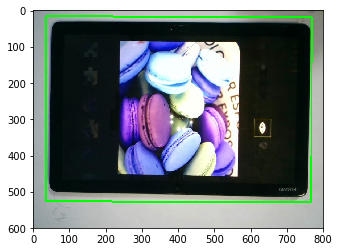

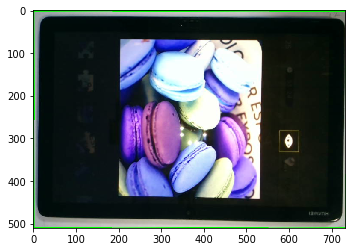

In [4]:
test = cli.getPic()
#plt.imshow(test)
#cv2.imwrite
cut = get_Contour(test)
plt.imshow(test)
plt.show()
#cv2.imwrite("cut_pad.png",cut)
plt.imshow(cut)
plt.show()

In [40]:
cli.takAction(1,10,10)

received:     M         1         1 0         1 0


In [47]:
cli.takAction(1,165,10)

received:     M         1         1 6 5         1 0


In [46]:
cli.takAction(1,10,245)

received:     M         1         1 0         2 4 5


In [43]:
cli.getPos() # left upper corner  it is 85, 10, 0, right bottom corner is 15 -135 
'''
base
base = 10 10
pad:left upper corner is 165,10 ,right bottom corner is 15,245,
'''


received: 
(10.0, 245.0, 0)


'\nbase\nbase = 10 10\npad:left upper corner is 165,10 ,right bottom corner is 15,245,\n'

In [56]:
PHONESIZE = (150,235)


In [57]:
class Player:
    def __init__(self,cli):
        self.cli = cli
        self.basePoint = np.array([0,0])
        self.sourceimg = None # the image of the jagsaw to recover
        self.emptyimg = None # the image of the empty target area 
    def setBase(self):
        # move to where 0,0 point should be in the figure
        curr = self.cli.getPos()
        print("current position: ", curr[:2])
        self.basePoint = np.array(curr[:2])
    def moveto(self,x,y):
        x += self.basePoint[0]
        y += self.basePoint[1]
        x,y = int(x),int(y)
        cli.takAction(1,x,y)
        
    def movetoImg(self,x,y,imgshape,diviceShape = PHONESIZE):
        # imgshape is (y_shape, x_shape)
        '''
        x =  (1-x/imgshape[1]) * diviceShape[0] # because x is converted
        y =  y/imgshape[0] * diviceShape[1]
        '''
        x =  (1-x/imgshape[1]) * diviceShape[1] # because x is converted
        y =  y/imgshape[0] * diviceShape[0]
        x,y = y,x
        self.moveto(x,y)
    
    def retreat(self):
        #self.moveto(-10,-10)
        self.moveto(-10,-10)
#         self.cli.takAction(3,0,0)
    
    def clickAtImg(self, x, y,imgshape,diviceShape = PHONESIZE):
        print(imgshape,diviceShape)
        self.movetoImg(x, y,imgshape,diviceShape)
        time.sleep(2)
#         self.cli.takAction(2,0,0)
        self.cli.takAction(4,0,0)
        time.sleep(0.5)
        self.cli.takAction(3,0,0)
        self.retreat()
    
    def dragAtImg(self, x0,y0,x1,y1,imgshape,diviceShape = PHONESIZE):
        self.movetoImg(x0,y0,imgshape,diviceShape)
        self.cli.takAction(4,0,0)
        self.movetoImg(x1,y1,imgshape,diviceShape)
        self.cli.takAction(3,0,0)
    
    def tryOneDrag(self,x0,y0,x1,y1,imgshape,diviceShape = PHONESIZE):
        # drag the piece to the position and then drag it back
        # if it is the correct piece it will stay there
        self.dragAtImg(x0,y0,x1,y1,imgshape,diviceShape = PHONESIZE)
        time.sleep(2)
        #self.dragAtImg(x1,y1+30,x0,y0-30,imgshape,diviceShape = PHONESIZE)
        self.dragAtImg(x1,y1,x0-30,y0-30,imgshape,diviceShape = PHONESIZE)
        self.retreat()
        
    def getOneShot(self):
        img = self.cli.getPic()
        img = get_Contour(img)
        return img
    
    def initGame(self):
        # The phone should be before the game start
        self.retreat()
        img = self.getOneShot()
        #source ?
        self.sourceimg = img
        y,x = img.shape[:2]
        #x,y = x*0.502,y*0.237
        x,y = x*0.4,y*0.16
        self.clickAtImg(x,y,img.shape[:2])
        time.sleep(3)
        img = self.getOneShot()
        self.emptyimg = cutout_target(img)
        plt.imshow(self.sourceimg)
        plt.show()
        plt.imshow(self.emptyimg)
        plt.show()
               
        
        
ply = Player(cli)

In [58]:
cli.takAction(1,10,10)

received:     M         1         1 0         1 0


In [59]:
ply.setBase()

received: 
(10.0, 10.0, 0)
current position:  (10.0, 10.0)


In [60]:
ply.retreat()

received:     M         1         0         0


received:     M         1         0         0
received: 
600 800 3
30000
1.2275772094726562
(508, 736) (150, 235)
received:     M         1         3 4         1 5 1
received:     M         4         0         0
received:     M         3         0         0
received:     M         1         0         0
received: 
600 800 3
30000
1.3019485473632812


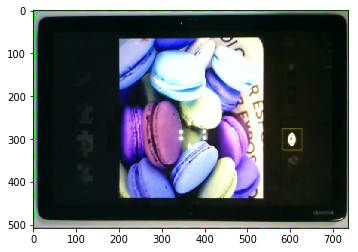

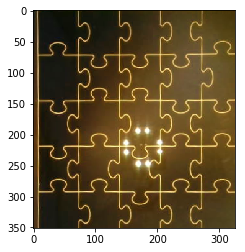

In [61]:
ply.initGame()

In [29]:
#ply.tryOneDrag(100,40, 300,100,ply.sourceimg.shape[:2])
ply.tryOneDrag(430,440, 420,200,ply.sourceimg.shape[:2])
#cli.takAction(1,45,10)

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
ply.sourceimg.shape[:2]

In [26]:
ply.movetoImg(50,0, [50,100] , [70,145] )

received:     M         1         3 5         0


In [62]:
from matchUtil import *

received: 
600 800 3
30000
0.9022293090820312
115.44800000000001 291.944


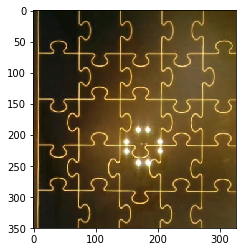

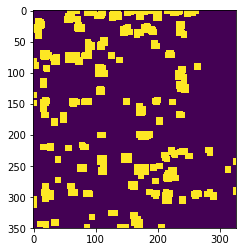

[[49.20659341 92.58461538 93.59340659 74.42637363  3.08241758]
 [62.93736264 60.63956044  7.06153846 49.93516484  6.10879121]
 [53.91428571 26.45274725 44.33076923 29.7032967   0.        ]
 [34.24285714 49.5989011  54.92307692 83.16923077 17.03736264]
 [59.29450549 28.47032967 50.4956044  45.9        27.29340659]]
possible: [[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
scores: [[15190538.26504411  1078571.76829657  1569422.51475046  5270692.19958619
    876573.75400298]
 [36078206.79022954 18544477.94371108  7392557.79591345  2332856.8637649
  15949073.15000483]
 [12806471.84788425  3476056.82512502  4606385.12019441 20553301.34115686
   1630024.08795362]
 [26024731.70545347  2793721.12139582  1296994.21241155  8903427.70708255
  10744915.80089568]
 [ 5094819.41192101  9778482.25443015  9927243.79242688  3036946.77758844
   4267586.05197427]]
0 1
received:     M     

ValueError: zero-size array to reduction operation minimum which has no identity

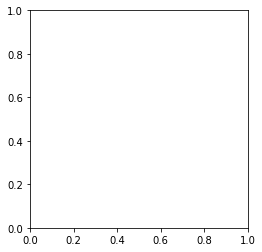

In [64]:
def playOneStep(ply):
    img = ply.getOneShot()
    target = cutout_target(img)
    (x0,y0), scores = matching(ply.sourceimg,img.copy(),mode = "match")
    print(x0,y0)
    #应该还需要10-20的调整
    #为什么有时候会出现不停止直接走然后图像出现异常的情况
    sor = cutout_source(ply.sourceimg,img)
    
    plt.imshow(target)
    plt.show()
    possible = findEmpty(ply.emptyimg,target,mode = "debug")
    initial_num = possible.sum()
    print("possible:", possible)
    print("scores:",scores)
    while(possible.sum()>0):
        y = np.argmax(scores)//5 # x => i 
        x = np.argmax(scores)%5
        print(x,y)
        scores[y][x]=-1
        if(not possible[x][y]):
            continue
        possible[x][y] = False
        # add the source area margine
        x = int(x*sor.shape[1]/5)
        y = int(y*sor.shape[0]/5)
        x += int(ply.sourceimg.shape[1]*0.264)
        y += int(ply.sourceimg.shape[0]*0.138)
        ply.tryOneDrag(x0,y0,x,y,img.shape[:2])
        time.sleep(5)
        timg = ply.getOneShot()
        timg = cutout_target(timg)
        
        plt.imshow(timg)
        plt.show()
        empty = findEmpty(ply.emptyimg,timg,mode = "debug")
        
        if(empty.sum()<initial_num):
            break
playOneStep(ply)

In [ ]:
plt.imshow(ply.sourceimage)